<a href="https://colab.research.google.com/github/MahmoudEssam707/Data-Tools/blob/main/Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.metrics import pairwise_distances
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.linear_model import LinearRegression  # Add this line
import matplotlib
%matplotlib inline
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def wrangle(iris):
    """
    Process and clean the Iris dataset.

    Parameters:
    - iris: The Iris dataset.

    Returns:
    - iris_df: Cleaned DataFrame.
    """
    # Reading Data
    iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    # Column with species names
    iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
    # Encoded Columns
    iris_df['encoded'] = iris.target
    # Display data intervals
    print(iris_df.describe(), '_' * 100, sep='\n')
    # Checking duplicated data and deleting it
    print(f"Number of Duplications in Iris Data = {iris_df.duplicated().sum()}\n{'_' * 100}",
          "Voilà, now there's no duplication in data :3", sep='\n')
    iris_df.drop_duplicates(inplace=True)
    # Let's See Nulls
    print(iris_df.isnull().sum(), '_' * 100, sep='\n')
    return iris_df

In [ ]:
iris = load_iris()
iris_df = wrangle(iris)

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)     encoded  
count        150.000000  150.000000  
mean           1.199333    1.000000  
std            0.762238    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  
________________________________________________________________________

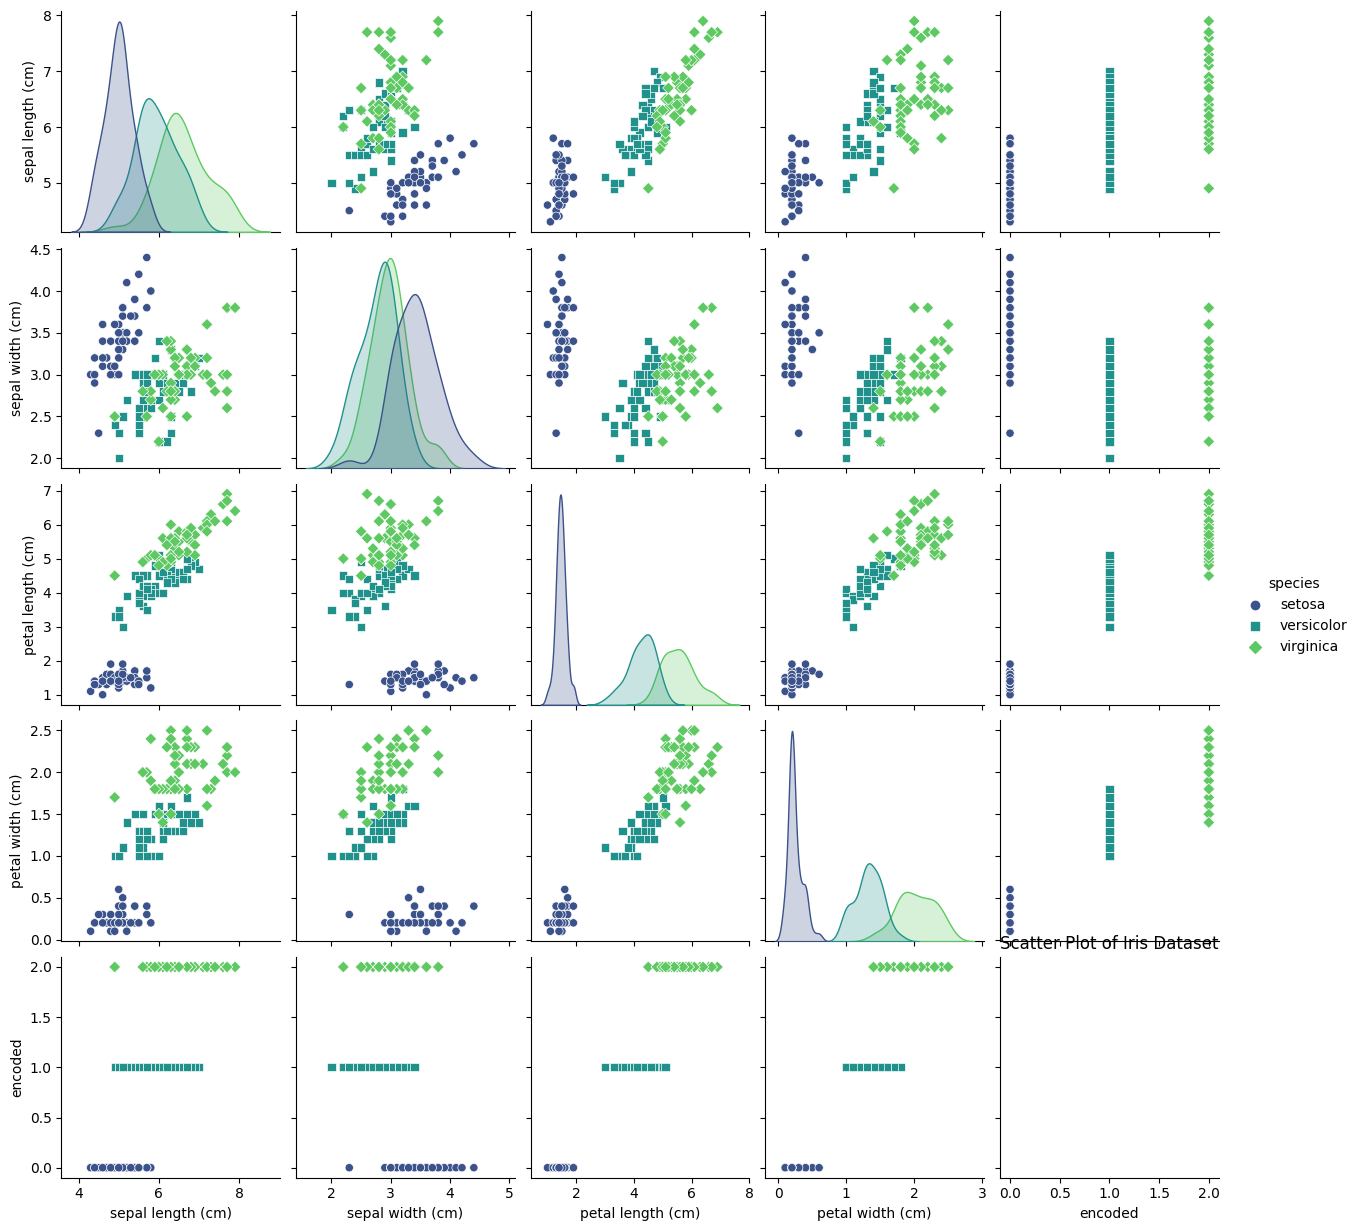

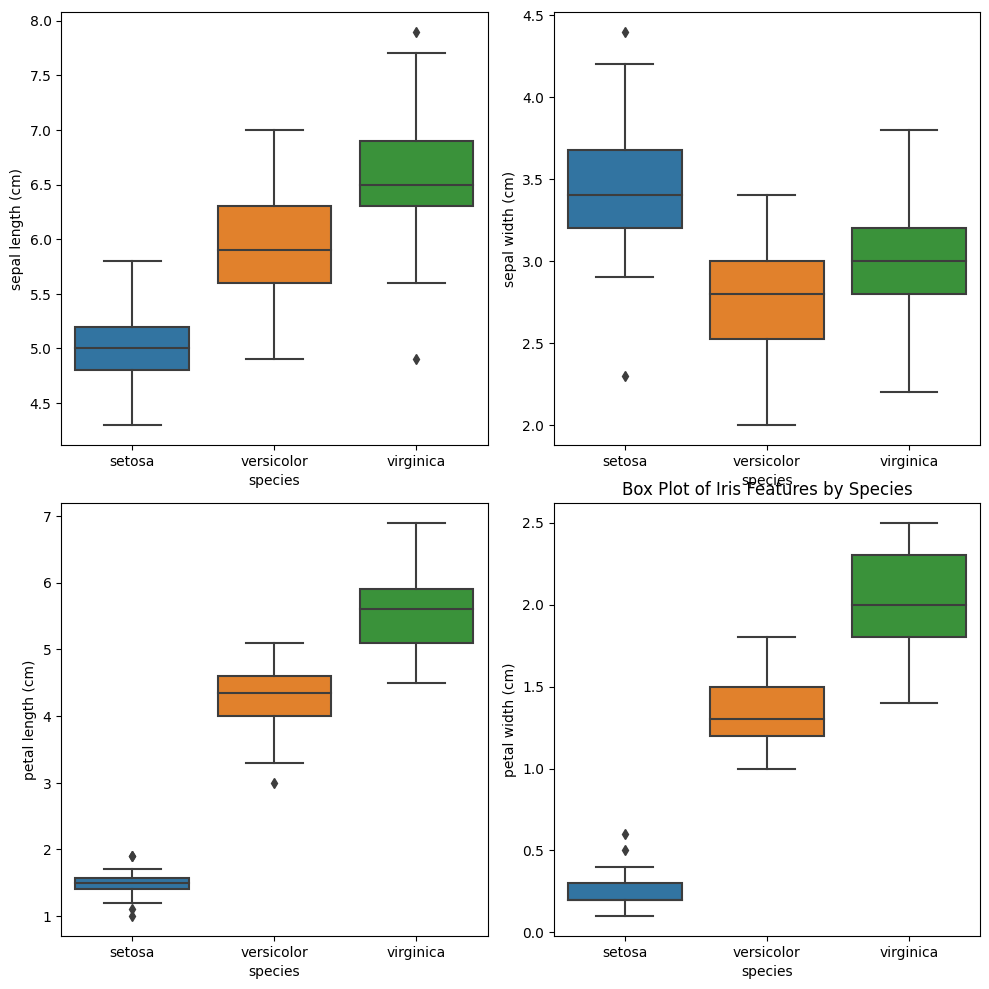

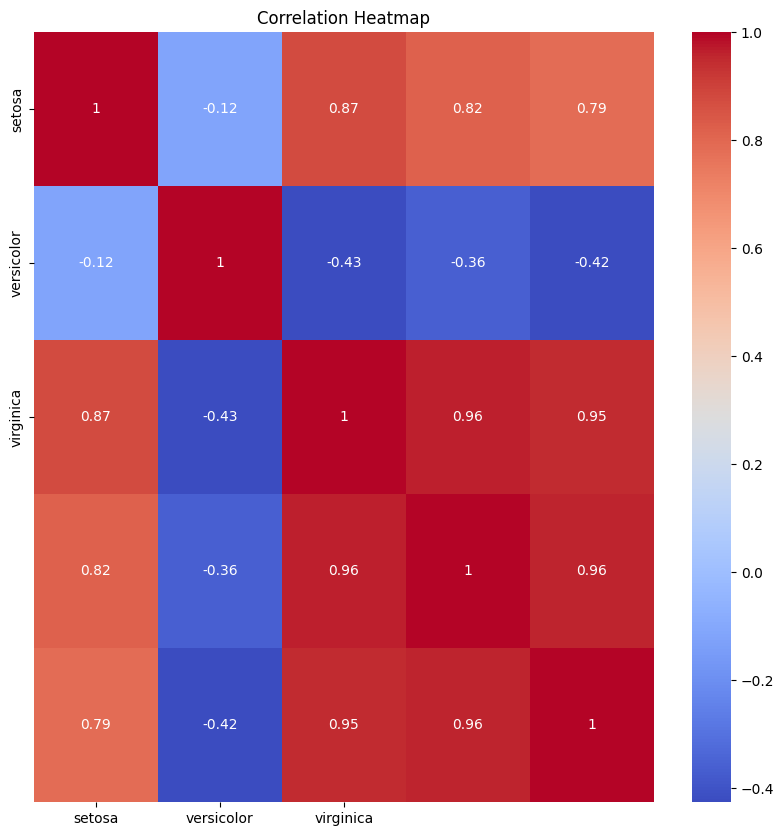

In [ ]:
# Scatter Plot
sns.pairplot(iris_df, hue='species', markers=["o", "s", "D"], palette='viridis')
plt.title('Scatter Plot of Iris Dataset')
plt.show()

# Box Plot
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
for i, ax in enumerate(axes.flatten()):
    sns.boxplot(x='species', y=iris.feature_names[i], data=iris_df, ax=ax)
plt.tight_layout()
plt.title('Box Plot of Iris Features by Species')
plt.show()

# Heatmap
species_names = iris.target_names
species_corr = iris_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(species_corr, annot=True, cmap='coolwarm', xticklabels=species_names, yticklabels=species_names)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
X = iris_df.drop(columns=['encoded','species'])
y = iris_df['encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Create a Decision Tree classifier
model = DecisionTreeClassifier()

# Define the hyperparameters to tune
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform Grid Search for hyperparameter tuning
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_model = grid_search.best_estimator_


In [ ]:
# Create a Sequential model
Neural = Sequential()
Neural.add(Dense(8, input_dim=4, activation='relu'))
Neural.add(Dense(8, activation='relu'))
Neural.add(Dense(3, activation='softmax'))

# Compile the model
Neural.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
Neural.fit(X_train, y_train, epochs=100, batch_size=5, verbose=0)

In [ ]:
def perform_prediction(sepal_length, sepal_width, petal_length, petal_width, model_type):
    if model_type not in ['Decision Tree', 'Neural Network']:
        print("Invalid model type. Please select either 'Decision Tree' or 'Neural Network'.")
        return

    user_input = [[sepal_length, sepal_width, petal_length, petal_width]]

    if model_type == 'Decision Tree':
        predicted_species = best_model.predict(user_input)
    else:
        predicted_probabilities = Neural.predict(np.array(user_input))
        predicted_species = np.argmax(predicted_probabilities)

    species_name = iris.target_names[predicted_species]
    print(f"The predicted species for the given values is: {species_name}")


# Define input widgets
sepal_length_widget = widgets.FloatSlider(value=5.1, min=0, max=10.0, step=0.1)
sepal_width_widget = widgets.FloatSlider(value=3.5, min=0, max=10.0, step=0.1)
petal_length_widget = widgets.FloatSlider(value=1.4, min=0, max=10.0, step=0.1)
petal_width_widget = widgets.FloatSlider(value=0.2, min=0, max=10.0, step=0.1)
model_widget = widgets.Dropdown(options=['Decision Tree', 'Neural Network'], description='Model')

# Create interactive UI
interactive_plot = interactive(perform_prediction, sepal_length=sepal_length_widget, sepal_width=sepal_width_widget,
                               petal_length=petal_length_widget, petal_width=petal_width_widget, model_type=model_widget)

# Display the UI
display(interactive_plot)


interactive(children=(FloatSlider(value=5.1, description='sepal_length', max=10.0), FloatSlider(value=3.5, des…

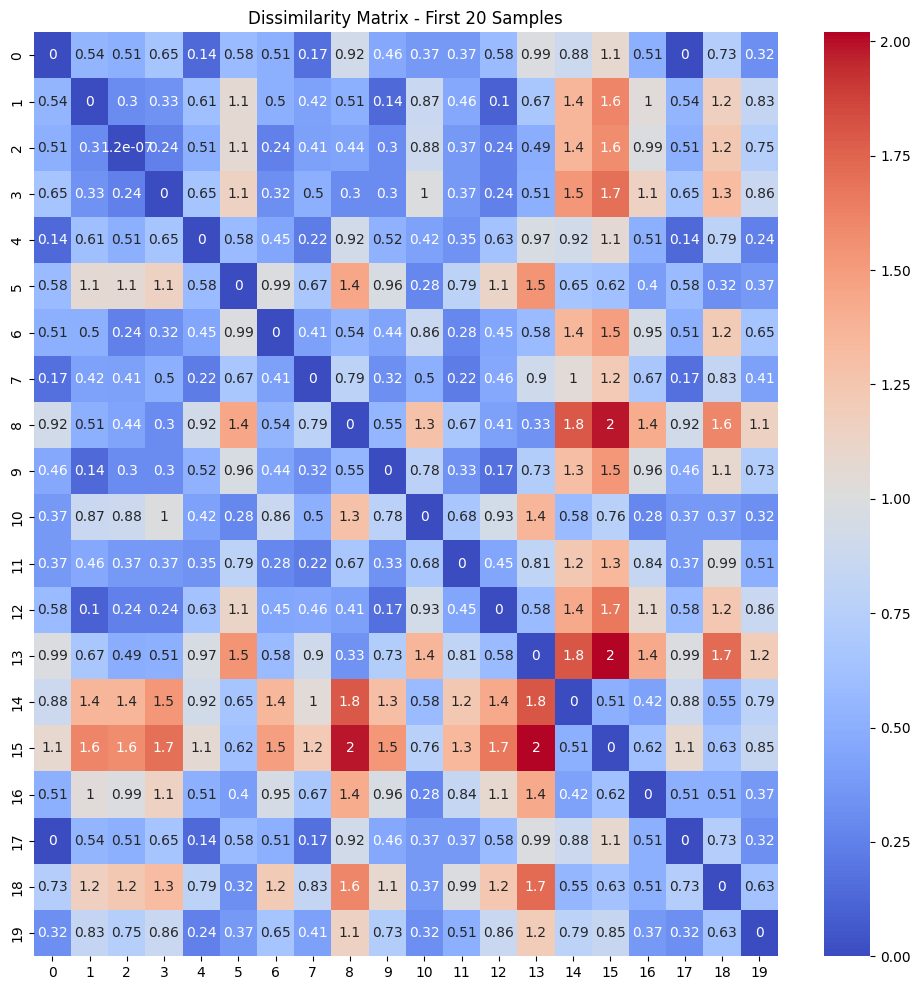

First 20 Dissimilarity Values:
 [[0.00000000e+00 5.38516481e-01 5.09901951e-01 6.48074070e-01
  1.41421356e-01 5.83095189e-01 5.09901951e-01 1.73205081e-01
  9.21954446e-01 4.58257569e-01 3.74165739e-01 3.74165739e-01
  5.83095189e-01 9.89949494e-01 8.83176087e-01 1.08627805e+00
  5.09901951e-01 0.00000000e+00 7.34846923e-01 3.16227766e-01]
 [5.38516481e-01 0.00000000e+00 3.00000000e-01 3.31662479e-01
  6.08276253e-01 1.07238053e+00 5.00000000e-01 4.24264069e-01
  5.09901951e-01 1.41421356e-01 8.66025404e-01 4.58257569e-01
  1.00000000e-01 6.70820393e-01 1.36014705e+00 1.61554944e+00
  1.03440804e+00 5.38516481e-01 1.17046999e+00 8.30662386e-01]
 [5.09901951e-01 3.00000000e-01 1.19209290e-07 2.44948974e-01
  5.09901951e-01 1.06770783e+00 2.44948974e-01 4.12310563e-01
  4.35889894e-01 3.00000000e-01 8.83176087e-01 3.74165739e-01
  2.44948974e-01 4.89897949e-01 1.36381817e+00 1.57480157e+00
  9.89949494e-01 5.09901951e-01 1.23288280e+00 7.48331477e-01]
 [6.48074070e-01 3.31662479e-01 2.4

In [ ]:
# Calculate dissimilarity matrix for the entire dataset
dissimilarity_matrix = pairwise_distances(iris_df.iloc[:, :-3], iris_df.iloc[:20, :-3], metric='euclidean')

# Convert the dissimilarity matrix to a DataFrame
dissimilarity_df = pd.DataFrame(dissimilarity_matrix[:20, :], columns=iris_df.index[:20], index=iris_df.index[:20])

# Export the DataFrame to a CSV file
dissimilarity_df.to_csv('dissimilarity_matrix.csv')

# Display heatmap for dissimilarity matrix (showing only the first 20 samples)
plt.figure(figsize=(12, 12))
sns.heatmap(dissimilarity_matrix[:20, :], annot=True, cmap='coolwarm', xticklabels=iris_df.index[:20], yticklabels=iris_df.index[:20])
plt.title('Dissimilarity Matrix - First 20 Samples')
plt.show()

# Show the first 20 dissimilarity values
print("First 20 Dissimilarity Values:\n", dissimilarity_matrix[:20, :])
